# Lecture 06의 데모

### Lecture 06의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec07.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec08.ipynb

In [36]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [37]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

# Lecture 05

## Cargegorical Data

In [38]:
Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


## **Bar Charts**

In [39]:
top_movies = Table.read_table('top_movies_2017.csv')

In [40]:
top10_adjusted = top_movies.take(np.arange(10))

In [41]:
top10_adjusted.column('Gross (Adjusted)')

array([1796176700, 1583483200, 1266072700, 1261085000, 1204368000,
       1164590000, 1138620700, 1103564200,  983226600,  969010000])

In [42]:
# np.round는 올림함수
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1e6, 3)
top10_adjusted = top10_adjusted.with_column('Millions',millions)

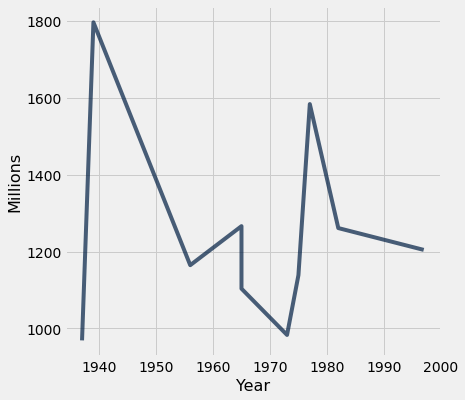

In [43]:
# plot은 보통 numerical data 처리를 한다. 연도가 연속적인게 정확하지도 않고 서로 관련이 없어서 이렇게 뽑아낸게 의미는 없음
top10_adjusted.plot('Year', 'Millions')

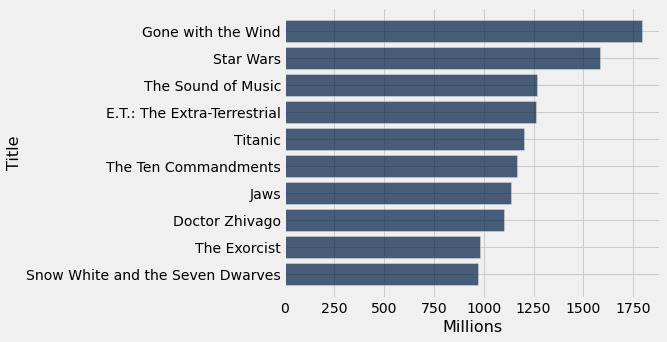

In [44]:
top10_adjusted.barh('Title','Millions')

**How Do You Generate This Chart?**

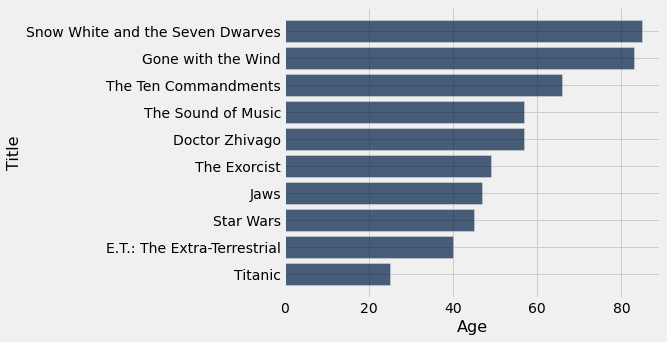

In [45]:
# 가로를 age of movie 세로를 title로 하는 차트를 만들어보자
year = top10_adjusted.column('Year')
# make_array(2022) - year -> broadcasting 지원하기때문에 가능함
top10_adjusted = top10_adjusted.with_column('Age', 2022 - year)
top10_adjusted.sort('Age', descending=True).barh('Title','Age')

## **Categorical Distribution**

In [46]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [47]:
# select의 결과는 Table
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [48]:
# 같은 이름을 묶어서 count 출력해줌 - 테이블 형태로 뽑아준다.
# Category한 데이터는 group을 사용하여 distribution을 표현한다.
# Attribution(label)에 해당하는 value들마다의 count를 보여준다.
studio_distribution = studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


## **Bar Charts**

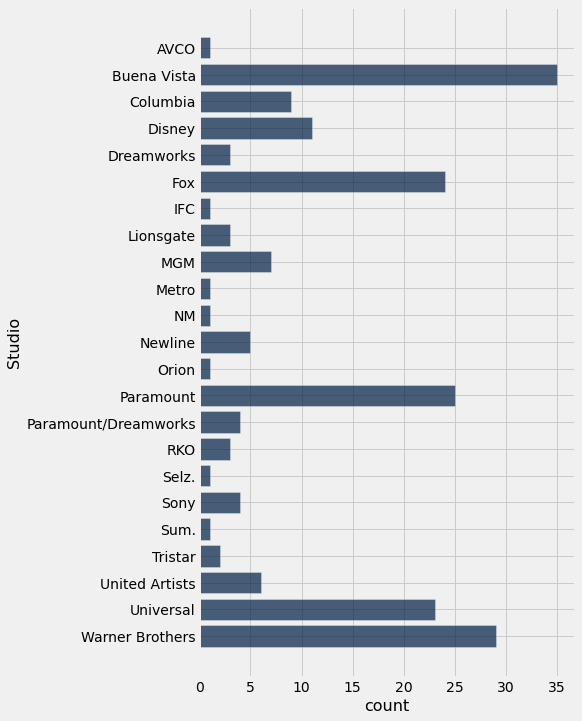

In [49]:
studio_distribution.barh('Studio')

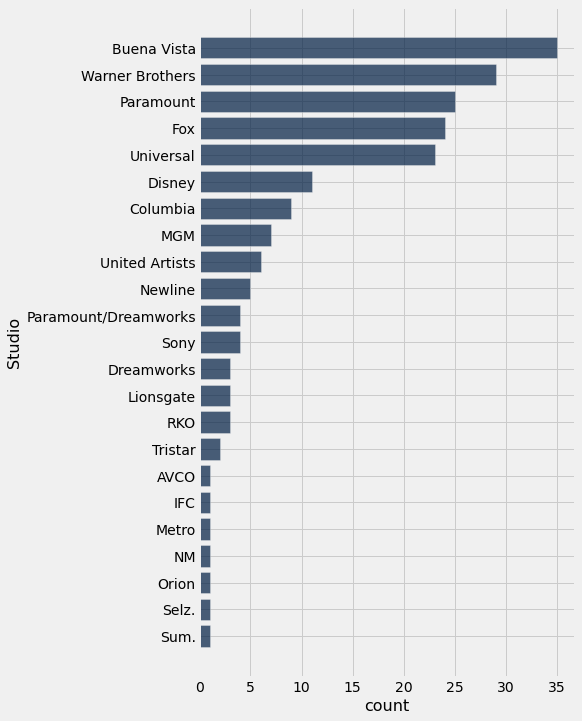

In [50]:
studio_distribution.sort('count', descending=True).barh('Studio')

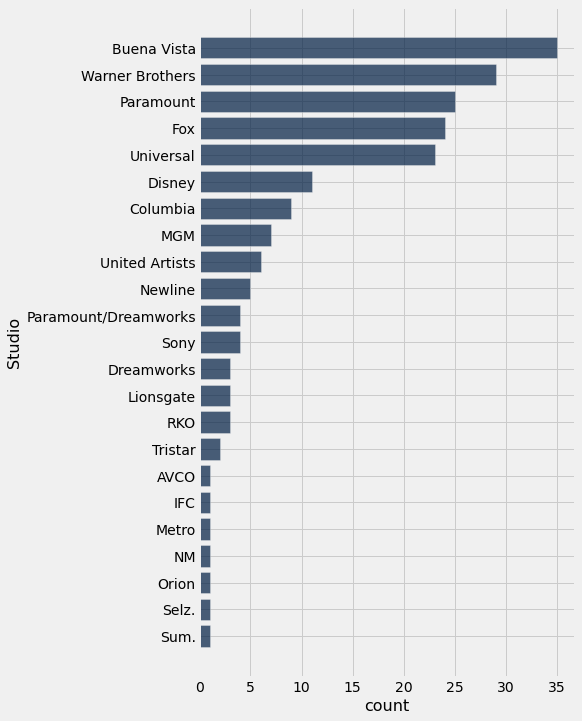

In [51]:
# 괄호 묶어서 여러줄 가능
(top_movies
          .group('Studio')
          .sort('count',descending=True)
          .barh('Studio'))

## **Numerical Distribution**

In [52]:
# 카테고리 값은 같은 것이 나올 확률이 높음
# numerical은 bin을 사용해서 "범위 안"에 포함시켜서 distribution 표현함
# 숫자 자체를 사용하면 distribution 표현할 수 있다.
ages = 2022 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages).drop('Year')
top_movies

Title,Studio,Gross,Gross (Adjusted),Age
Gone with the Wind,MGM,198676459,1796176700,83
Star Wars,Fox,460998007,1583483200,45
The Sound of Music,Fox,158671368,1266072700,57
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,40
Titanic,Paramount,658672302,1204368000,25
The Ten Commandments,Paramount,65500000,1164590000,66
Jaws,Universal,260000000,1138620700,47
Doctor Zhivago,MGM,111721910,1103564200,57
The Exorcist,Warner Brothers,232906145,983226600,49
Snow White and the Seven Dwarves,Disney,184925486,969010000,85


In [53]:
min(ages), max(ages)

(5, 101)

In [54]:
# 리스트와 배열은 구분합시다!
my_bins = make_array(0,5,10,15,25,40,65,105)
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 105])

In [55]:
# 뒤에 들어가는 array가 경계 기준들이 된다.
# 앞의 group과 다르게 numeric data의 distribution은 .bin을 사용한다.
binned_data = top_movies.bin('Age', bins=my_bins)
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
105,0


In [56]:
# bin을 어떻게 주냐에 따라서 age count를 만들어 낼 수 있다.
top_movies.bin('Age', bins=np.arange(0, 126, 25))

bin,Age count
0,81
25,70
50,39
75,9
100,1
125,0


## **Histogram**

In [57]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 105])

In [58]:
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
105,0


In [59]:
# 각 bin에 해당하는 영화 비율에 대한 column을 추가한다.
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200
)

In [60]:
binned_data

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8
15,40,20
25,42,21
40,56,28
65,21,10.5
105,0,0


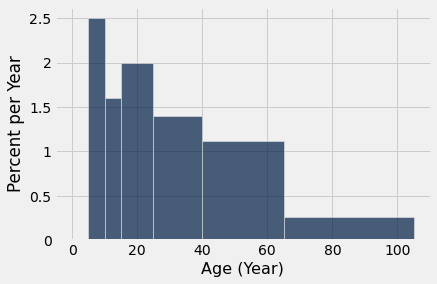

In [75]:
# 첫 히스토그램 만들기
# 자기가 알아서 bin에 맞춰서 몇퍼센트 차지하는지 계산해줌
# 그걸 알잘딱하게 bin 간격으로 나눠서 보여준다.
top_movies.hist('Age', bins = my_bins, unit = 'Year')

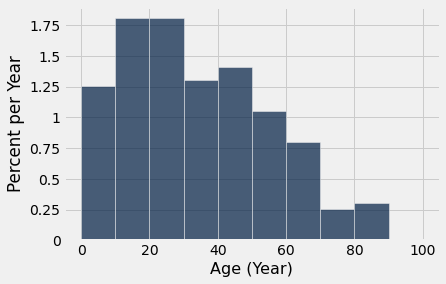

In [70]:
# 동일한 bin 간격을 주면
top_movies.hist('Age', bins=np.arange(0,110,10), unit='Year')

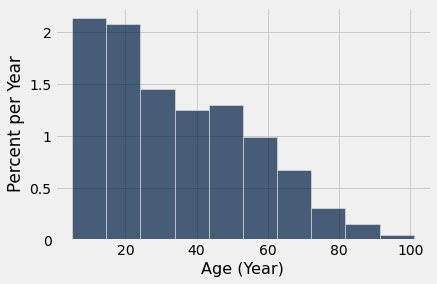

In [73]:
# bin을 따로 주지 않을 경우
top_movies.hist('Age', unit='Year')

## **Height**

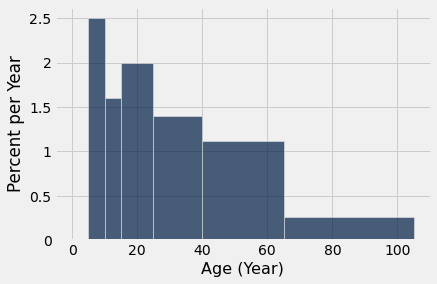

In [76]:
top_movies.hist('Age', bins=my_bins, unit='Year')

**Question: What is the height of the [40, 65) bin?**

In [80]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin',40).column('Percent').item(0)

In [81]:
# Step 2: Calculate the width of the 40-65 bin
width=65-40

In [82]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.12

### What are the hights of the rest of the bins?

In [83]:
# bin left 가져오자
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [86]:
# bin width 구하기
# diff은 뒤의 요소와 앞의 요소를 계산해줌
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)
bin_lefts

bin,Age count,Percent,Width
0,0,0,5
5,25,12.5,5
10,16,8,5
15,40,20,10
25,42,21,15
40,56,28,25
65,21,10.5,40


In [87]:
# bin height 구하기
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [88]:
bin_lefts

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,25,12.5,5,2.5
10,16,8,5,1.6
15,40,20,10,2
25,42,21,15,1.4
40,56,28,25,1.12
65,21,10.5,40,0.2625


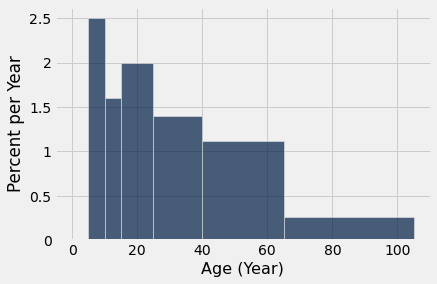

In [89]:
top_movies.hist('Age', bins=my_bins, unit = 'Year')